#### Data Structures (1): Vocab, Lexemes and StringStore

Welcome back! Now that you've had some real experience using spaCy's objects, it's time for you to learn more about what's actually going on under spaCy's hood.

In this lesson, we'll take a look at the shared vocabulary and how spaCy deals with strings.

spaCy stores all shared data in a vocabulary, the Vocab.

This includes words, but also the labels schemes for tags and entities.

To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as nlp.vocab.strings.

It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

Hash IDs can't be reversed, though. If a word is not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.

Shared vocab and string store

- Vocab: stores data shared across multiple documents
- To save memory, spaCy encodes all strings to hash values
- Strings are only stored once in the StringStore via nlp.vocab.strings
- String store: lookup table in both directions

In [1]:
import spacy

/home/max/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-23 22:47:47.043981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 22:47:47.235375: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-23 22:47:47.959803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_lo

In [2]:
nlp = spacy.load("en_core_web_sm")

In [4]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

print(coffee_hash)
print(coffee_string)

3197928453018144401
coffee


#### Hashes can't be reversed – that's why we need to provide the shared vocab

In [11]:
string = nlp.vocab.strings[3197928453018144401]
string

'coffee'

To get the hash for a string, we can look it up in nlp.vocab.strings.

To get the string representation of a hash, we can look up the hash.

A Doc object also exposes its vocab and strings.

- Look up the string and hash in nlp.vocab.strings

In [12]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


- The doc also exposes the vocab and strings

In [13]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


##### Lexemes: entries in the vocabulary

Lexemes are context-independent entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.

- A Lexeme object is an entry in the vocabulary

In [14]:
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


- Contains the context-independent information about a word
    - Word text: lexeme.text and lexeme.orth (the hash)
    - Lexical attributes like lexeme.is_alpha
    - Not context-dependent part-of-speech tags, dependencies or entity labels

#### Vocab, hashes and lexemes

Here's an example.

The Doc contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.

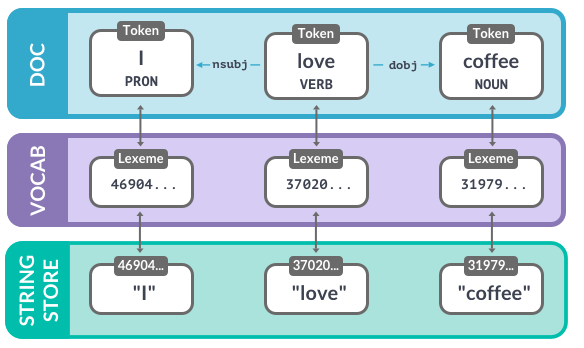